In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# RGB
# hsl hue saturation lightness
# here all around the cylinder there wil be different color, 
# which is the hue we are loking for  and the saturation is how much of the hue we have 
# and lightness, here define how dark or light it is 
#


# hsv hue saturation value 
# here instead of lightness we have value, 


# hsl and hsv are close to human vision 
# 

In [4]:
#

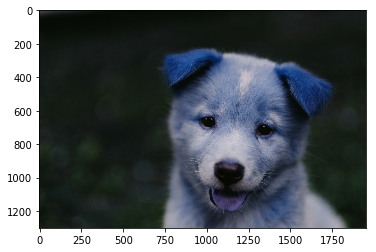

In [5]:
img = cv2.imread('DATA/00-puppy.jpg')
plt.imshow(img)

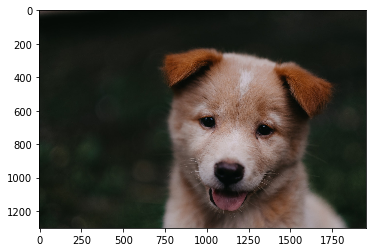

In [6]:
img_c = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_c)

In [7]:
img_h = img_c.copy()

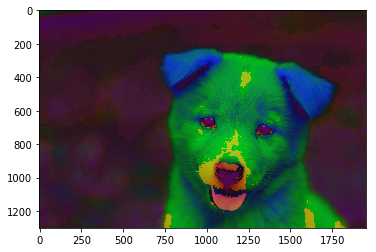

In [8]:
img_h = cv2.cvtColor(img_c, cv2.COLOR_RGB2HLS)
plt.imshow(img_h)

In [9]:
#

# Blending and pasting images 

In [10]:
# blending images is done through the addWeighted function, 
# which uses both the iamges and combines them 

# new_pixel  = a*pixel_1 + b*pixel_2 + C 


In [11]:
img_1 = cv2.imread('DATA/dog_backpack.png')
img_1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
img_2 = cv2.imread('DATA/watermark_no_copy.png')
img_2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB)

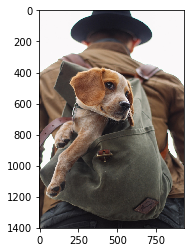

In [12]:
plt.imshow(img_1)

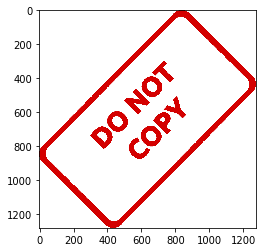

In [13]:
plt.imshow(img_2)

In [14]:
img_1.shape

(1401, 934, 3)

In [15]:
img_2.shape

(1280, 1277, 3)

In [16]:
# lets resize to make it equal 

In [17]:
img_1 = cv2.resize(img_1,(1200,1200))
img_2 = cv2.resize(img_2,(1200,1200))

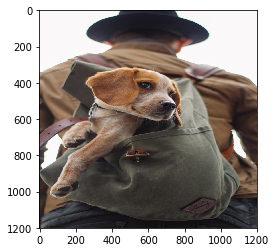

In [18]:
plt.imshow(img_1)

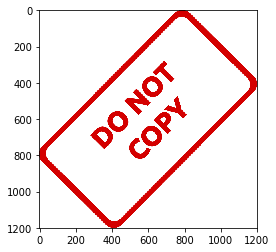

In [19]:
plt.imshow(img_2)

In [20]:
# let blend the iamges now 

In [21]:
blended  = cv2.addWeighted(src1=img_1, alpha=0.5, src2=img_2, beta=0.5, gamma=0)

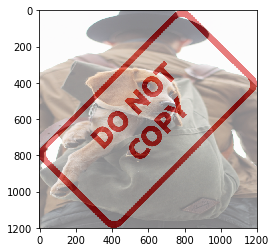

In [22]:
plt.imshow(blended)

In [23]:
# overlay small image on top of large image 
# (no blending)
# here it is numpy re-assignment 

In [24]:
img_1 = cv2.imread('DATA/dog_backpack.png')
img_1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
img_2 = cv2.imread('DATA/watermark_no_copy.png')
img_2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB)

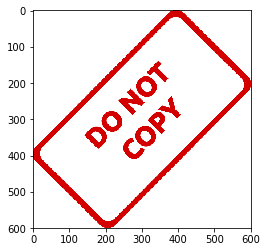

In [25]:
img_2 = cv2.resize(img_2,(600,600))
plt.imshow(img_2)

In [26]:
large_img = img_1
small_img  = img_2

In [27]:
# 
print(large_img.shape)
print(small_img.shape)

(1401, 934, 3)
(600, 600, 3)


In [28]:
# x and y cordinates of the pixcel start from 00
x_offset = 0
y_offset = 0

In [29]:
# here we are defining where we end  x and y offset
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [30]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

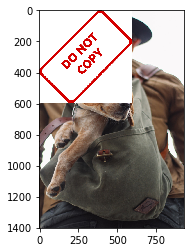

In [31]:
plt.imshow(large_img)

# Masking 

In [32]:
# blending iamges of different sizes 
# 

In [33]:
img_1 = cv2.imread('DATA/dog_backpack.png')
img_1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
img_2 = cv2.imread('DATA/watermark_no_copy.png')
img_2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB)

In [34]:
img_2 = cv2.resize(img_2,(600,600))

In [35]:
#

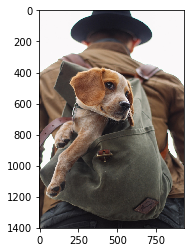

In [36]:
plt.imshow(img_1)

In [37]:
img_1.shape

(1401, 934, 3)

In [38]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [39]:
img_2.shape

(600, 600, 3)

In [40]:
rows,cols,channels = img_2.shape

In [41]:
# region of intrest 

In [42]:
ROI = img_1[y_offset:1401,x_offset:943]

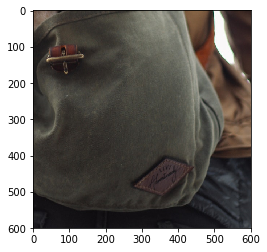

In [43]:
plt.imshow(ROI)

In [44]:
#

In [45]:
img2gray  = cv2.cvtColor(img_2,cv2.COLOR_RGB2GRAY)

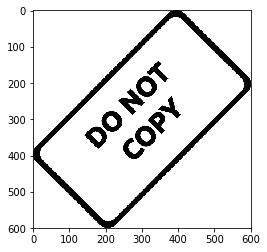

In [46]:
plt.imshow(img2gray,cmap='gray')

In [47]:
# inverse of gray scale 
mask_inv = cv2.bitwise_not(img2gray)

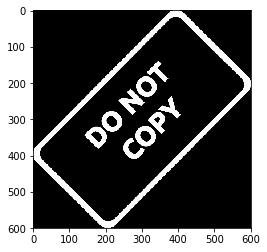

In [48]:
plt.imshow(mask_inv, cmap='gray')

In [49]:
mask_inv.shape

(600, 600)

In [50]:
# this will convert back to 3 channel
# here we are just creating an np array
# what the array should look like, what is should be full of (white background)
white_background = np.full(img_2.shape,255,dtype=np.uint8)

In [51]:
white_background.shape

(600, 600, 3)

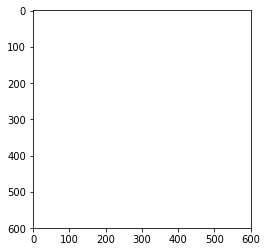

In [52]:
plt.imshow(white_background)

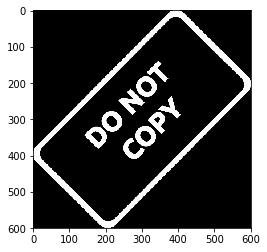

In [53]:
plt.imshow(mask_inv, cmap='gray')

In [54]:
# here we combined the image and the numpy array with 3 channel
bk = cv2.bitwise_or(white_background, white_background,mask=mask_inv)

In [55]:
bk.shape

(600, 600, 3)

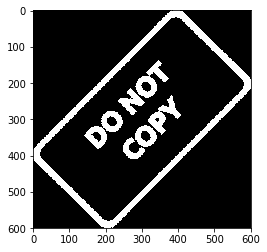

In [56]:
plt.imshow(bk)

In [57]:
fg = cv2.bitwise_or(img_2,img_2,mask=mask_inv)

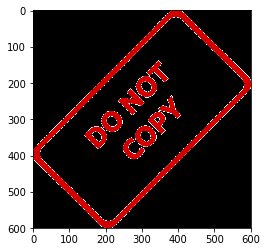

In [58]:
plt.imshow(fg)

In [60]:
final_ROI = cv2.bitwise_or(ROI,fg)

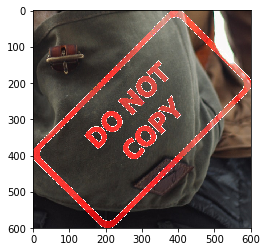

In [61]:
plt.imshow(final_ROI)

In [62]:
large_img = img_1
small_img = final_ROI

In [63]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img   

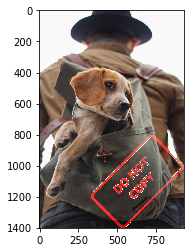

In [64]:
plt.imshow(large_img)

In [65]:
#